# Think Like a Machine - Chapter 7
Neural Networks
===============

**ACKNOWLEDGEMENT**

**The MNIST data loader is adapted from https://github.com/sorki/python-mnist/blob/master/mnist/loader.py. Also stole  ideas and code from Sonya Sawtelle's excellent blog at http://sdsawtelle.github.io/blog/output/week4-andrew-ng-machine-learning-with-python.html.**

In this notebook we're going to use neural networks in the SciKit Learn library to learn how to classify two datasets. The first dataset is the one we used in the non-linear logistic regression notebook. The second dataset is quite well known - it's a handwritten set of digits -- a bunch of images from a famous dataset called MNIST (http://yann.lecun.com/exdb/mnist/). Let's start with the MNIST dataset.

In [132]:
# Get access to the MNIST class defined in mnist_loader.py
%run mnist_loader.py

In [291]:
# Import our usual libraries
from __future__ import division 
import numpy as np
from numpy import random as rnd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

## Load the MNIST Data

We'll adapt a package from GitHub that allows us to read the second dataset and display the images in it.

In [134]:
# Initialize the mnist object
mnist = MNIST()
type(mnist)

__main__.MNIST

In [135]:
# Get the testing images and labels
test_images, test_labels = mnist.load_testing()

In [136]:
type(test_images), type(test_labels)

(list, array.array)

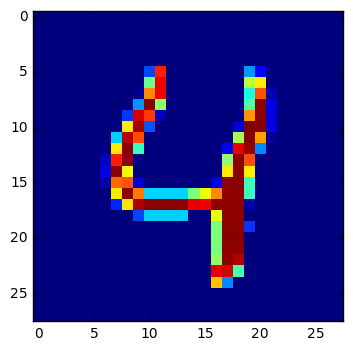

In [165]:
mnist.display(test_images[4])

In [139]:
# Get the training images and labels
train_images, train_labels = mnist.load_training()

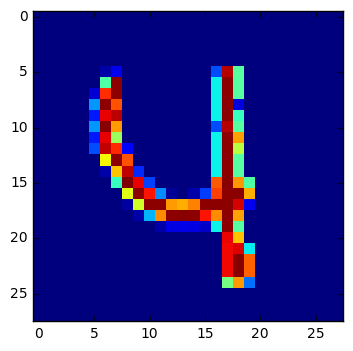

In [156]:
mnist.display(train_images[2390])

In [144]:
# How many images and labels in the training and test datasets?
[len(d) for d in [train_images, train_labels, test_images, test_labels]]

[60000, 60000, 10000, 10000]

In [150]:
# Size of the datasets
[np.array(d).shape for d in [train_images, train_labels, test_images, test_labels]]

[(60000, 784), (60000,), (10000, 784), (10000,)]

In [157]:
# How many unique digits do we have handwriting examples for?
list(set(test_labels))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [188]:
# Finally, extract the data as inputs to the neural network classifier.
# Scale the data and one-hot encode the labels
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

X_train = np.array(train_images)/255 # rescale to values between 0 and 1
# One-hot encode
y_train = enc.fit_transform(np.array(train_labels).reshape(-1,1)).toarray()

X_test = np.array(test_images)/255 # rescale
# One-hot encode
y_test = enc.fit_transform(np.array(test_labels).reshape(-1,1)).toarray()

In [190]:
y_train[2000]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [255]:
# We need a multi-level classifier because we have to classify digits into 0 through 9 distinct classes.

from sklearn.neural_network import MLPClassifier
# Hidden layers are specified as follows
# (n1, ) means n1 units and 1 hidden layer
# (n1, n2) means n1 units in the first hidden layer and n2 units in the second hidden layer
# (n1, n2, n3) maeans n1 units in the first hidden layer, n2 units in the second hidden layer,
#    and n3 units in the third hidden layer
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(25, 25), random_state=1, verbose=False, max_iter=50)

clf.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [344]:
# Use max_iter values of 50, 100, 150, and 200
# See how this changes the classifier's predictions for the first 5 images in the test dataset
clf.predict(X_test[0:5])

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

When the number of learning iterations is low, the model will often not make any predictions. You'll see all zeros in some or most of the arrays above. Sometimes you'll see multiple ones appear in a row -- that shows the classifier is (eerie!) confused about what number it is and makes a couple of best guesses. 

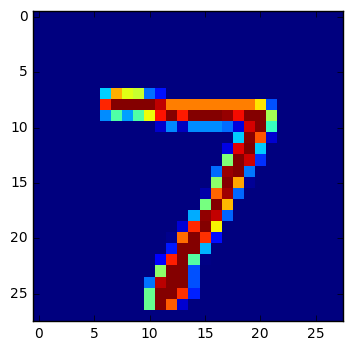

In [236]:
# Check if the first prediction read off from the one-hot encoding in the first list above
#  matches with the classifier's prediction
mnist.display(test_images[0])

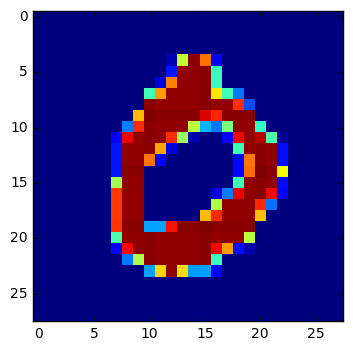

In [254]:
mnist.display(test_images[3])

In [345]:
# Select n_sel random images from the test dataset -- we have 10,000 test images in total (see above)
n_total = 10000
n_sel = 10
test_image_ids = rnd.choice(range(0,n_total - 1), n_sel, replace=False)

# for each of these image ids, get the test image
test_images_sel = [X_test[i] for i in test_image_ids]

# for each of these image ids, get the result from the classifier
clf.predict(test_images_sel)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

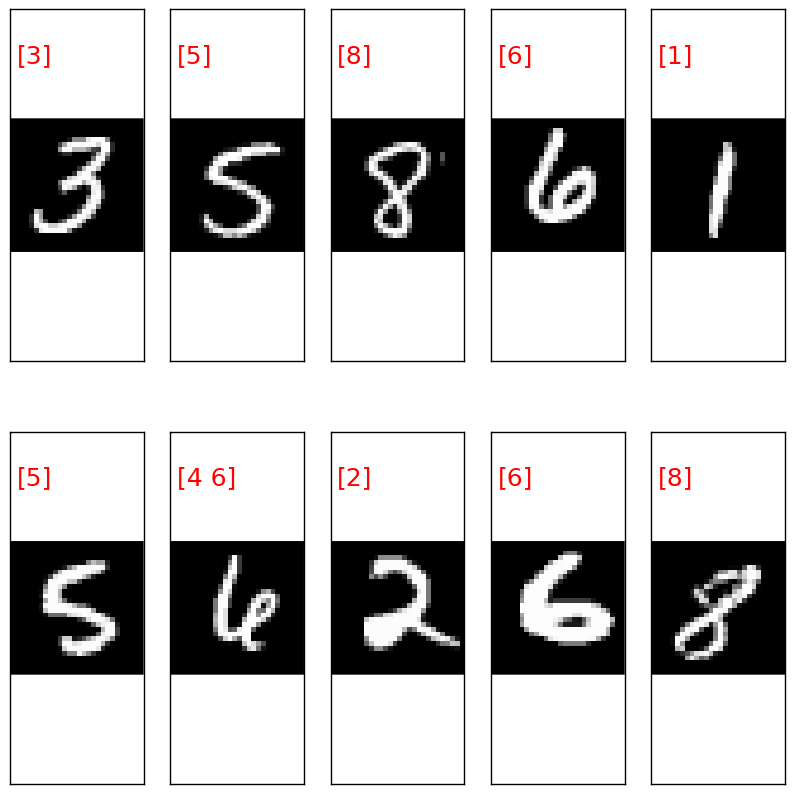

In [343]:
# Now show these randomly selected test images and our neural net classifier's prediction based on its training
# Adapted from Sonya Sawtelle
# http://sdsawtelle.github.io/blog/output/week4-andrew-ng-machine-learning-with-python.html
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(10,10)) 
axs = axs.flatten()  # The returned axs is actually a matrix holding the handles to all the subplot axes objects
graymap = plt.get_cmap("gray")

for i, indx in enumerate(test_image_ids):
    im_mat = np.reshape(test_images_sel[i], (28, 28))
    labl = str(np.where(clf.predict(test_images_sel[i].reshape(1, -1))[0] == 1)[0])  
    
    # Plot the image along with the label it is assigned by the fitted model.
    axs[i].imshow(im_mat, cmap=graymap, interpolation="None")
    axs[i].annotate(labl, xy=(0.05, 0.85), xycoords="axes fraction", color="red", fontsize=18)
    axs[i].xaxis.set_visible(False)  # Hide the axes labels for clarity
    axs[i].yaxis.set_visible(False) 

That's close to perfect, but just a small sample of the test dataset. But not bad for just using a pretty basic neural network. How does the classifier do over the entire dataset?

In [333]:
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))

Training set score: 0.913767
Test set score: 0.908900


In [363]:
# Misclassification of the test dataset
# Get all the results in terms of success or failure
results = [(clf.predict(X_test[i].reshape(1,-1)) == y_test[i]).all() for i in range(len(X_test))]
# Get the index numbers of all the failures
idx_failures = [i for i, x in enumerate(results) if x == False]

[[], [], [], [], [], [], [], [], [], []]

In [392]:
import itertools
# For each failure, find the right label and put it into a set under that label
group0 = []
group1 = []
group2 = []
group3 = []
group4 = []
group5 = []
group6 = []
group7 = []
group8 = []
group9 = []

groups = [group0, group1, group2, group3, group4, group5, group6, group7, group8, group9]
for i in idx_failures[0:20]:
    # find the label value -- i.e., the reverse of the the one-hot encoding
    # np.squeeze used to make label_value an integer rather than a 1 dim array
    label_value = np.squeeze(np.where(y_test[i] == 1)[0])
    # find the predicted value
    pred_value = np.where(clf.predict(X_test[i].reshape(1,-1))[0] == 1)[0]
    # put the predicted value in the appropriate label_value group
    groups[label_value].append(pred_value)
    #print pred_value

    
#list(itertools.chain.from_iterable(groups))    

In [396]:
for i in range(len(groups)):
    groups[i] = list(itertools.chain.from_iterable(groups[i]))

In [400]:
groups[2]

[]

## Getting Under the Hood

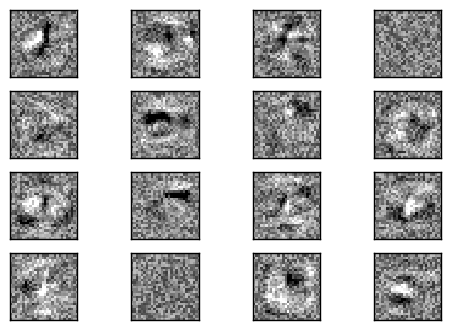

In [257]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [258]:
[clf.score(X_train, y_train), clf.score(X_test, y_test)]

[0.91376666666666662, 0.90890000000000004]

In [259]:
clf.loss_

0.36078283219406687

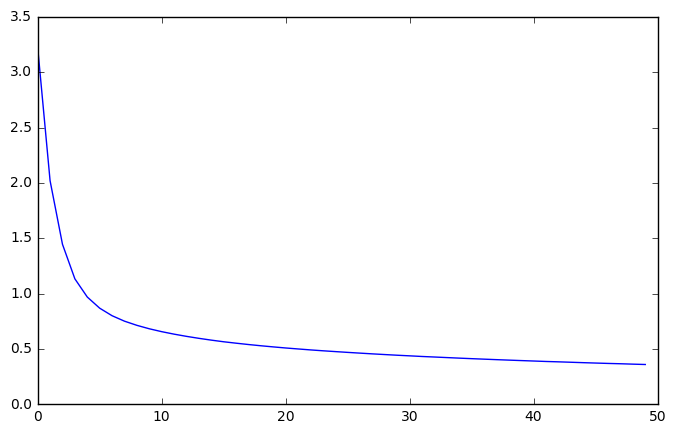

In [260]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(clf.loss_curve_)

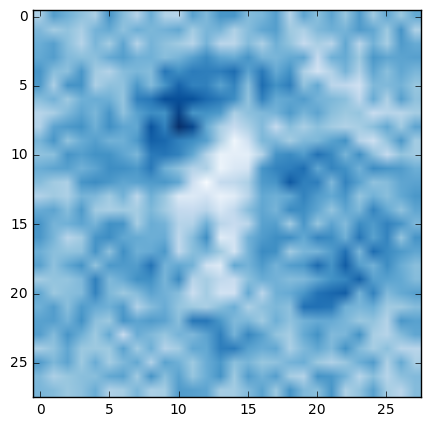

In [405]:
# Pull the weights of a given neuron in a given activation layer
# 
hidden_2 = np.transpose(clf.coefs_[1])[24]
fig, ax = plt.subplots(1, figsize=(5,5))
ax.imshow(np.reshape(hidden_2, (28,28)), cmap=plt.get_cmap("Blues_r"), aspect="auto")

In [269]:
clf.coefs_[0]

array([[-0.01429194,  0.03794817, -0.08609913, ..., -0.03213538,
         0.0331252 ,  0.06482839],
       [ 0.06796613, -0.07147101, -0.07939212, ..., -0.03554742,
        -0.03655308, -0.06372301],
       [-0.08278311,  0.03080221, -0.0496685 , ..., -0.0621302 ,
         0.05294435, -0.0176239 ],
       ..., 
       [-0.05790485,  0.05320061,  0.03263809, ...,  0.02257311,
         0.0554562 ,  0.05030796],
       [-0.03377717, -0.02021841,  0.07560723, ..., -0.03934274,
         0.02992951,  0.08340229],
       [-0.05955255,  0.05362033,  0.02634488, ...,  0.0716783 ,
         0.06946894,  0.00841453]])